## **Create CNN Model Using Transfer Learning using Vgg 16**

## **Keras Applications**
https://keras.io/api/applications/

Keras Applications are deep learning models that are made available alongside pre-trained weights. These models can be used for prediction, feature extraction, and fine-tuning.

Weights are downloaded automatically when instantiating a model. They are stored at ~/.keras/models/.

Upon instantiation, the models will be built according to the image data format set in your Keras configuration file at ~/.keras/keras.json. For instance, if you have set image_data_format=channels_last, then any model loaded from this repository will get built according to the TensorFlow data format convention, "Height-Width-Depth".

In [163]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [164]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [165]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [166]:
train_path = '/gdrive/My Drive/dataset/train'
valid_path = 'gdrive/My Drive/dataset/val'

In [167]:
# add preprocessing layer to the front of VGG
# include_top=False means we are not including the last layer
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [168]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [169]:
# useful for getting number of classes
folders = glob('/gdrive/My Drive/dataset/train/*')

In [170]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [171]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [172]:
# view the structure of the model
model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [173]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])

In [174]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [175]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [176]:
training_set = train_datagen.flow_from_directory('/gdrive/My Drive/dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 93 images belonging to 5 classes.


In [177]:
test_set = test_datagen.flow_from_directory('/gdrive/My Drive/dataset/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 25 images belonging to 5 classes.


In [178]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
3/3 [==============================] - 2s 640ms/step - loss: 2.4130 - accuracy: 0.1261 - val_loss: 1.7964 - val_accuracy: 0.3200
Epoch 2/5
3/3 [==============================] - 2s 523ms/step - loss: 1.3536 - accuracy: 0.5699 - val_loss: 1.4923 - val_accuracy: 0.5200
Epoch 3/5
3/3 [==============================] - 2s 531ms/step - loss: 0.9341 - accuracy: 0.6971 - val_loss: 0.9425 - val_accuracy: 0.5600
Epoch 4/5
3/3 [==============================] - 2s 518ms/step - loss: 0.5133 - accuracy: 0.8602 - val_loss: 0.9068 - val_accuracy: 0.5200
Epoch 5/5
3/3 [==============================] - 1s 519ms/step - loss: 0.3277 - accuracy: 0.9341 - val_loss: 0.6243 - val_accuracy: 0.8800


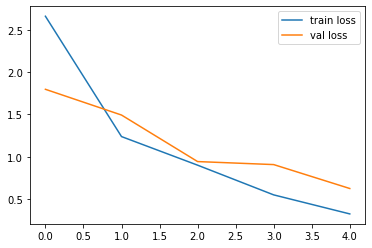

<Figure size 432x288 with 0 Axes>

In [179]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

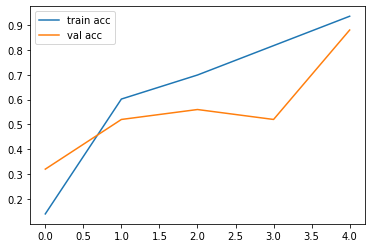

<Figure size 432x288 with 0 Axes>

In [180]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [181]:
#import tensorflow as tf
#from keras.models import load_model

In [182]:
#model.save('facefeatures_new_model.h5')